In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msn

In [2]:
# Configurações do PLOT
figsize = (10, 7)
matplotlib.rcParams['figure.figsize'] = figsize

In [3]:
# Leitura dos dados
data = pd.ExcelFile("https://pycourse.s3.amazonaws.com/ImperialCollege-COVID19-scenarios.xlsx")

In [4]:
print(f"worksheets disponíveis: {data.sheet_names}")

worksheets disponíveis: ['Countries', 'Mitigation', 'Suppression', 'Dictionary']


In [5]:
# Convertendo os dados para DataFrame
countries_df = pd.read_excel(data, data.sheet_names[0], decimal=',')

In [6]:
# Visualizando o dataframe
countries_df.head()

,"Region, subregion, country or area *",country_code,World Bank region,World Bank income grou,GDP 2018
0,Afghanistan,AFG,South Asia,Low income,1955.006208
1,Albania,ALB,Europe & Central Asia,Upper middle income,13364.155400
2,Algeria,DZA,Middle East & North Africa,Upper middle income,15481.787620
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,6452.355165
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,26868.133520


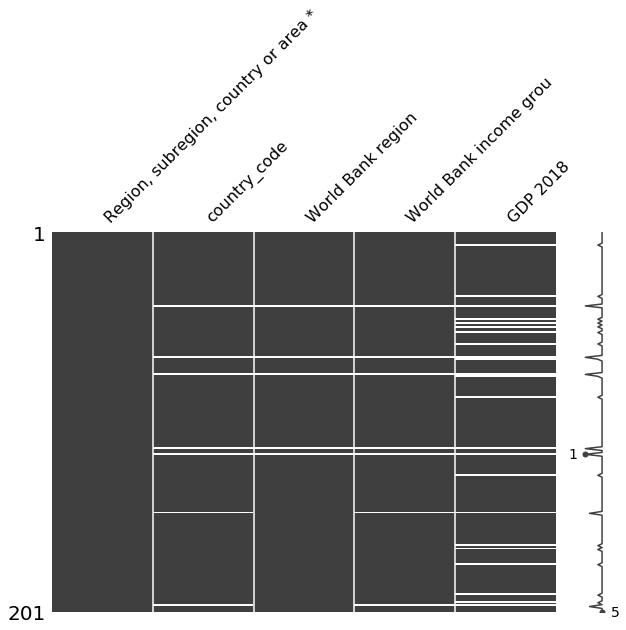

In [7]:
# Visualização dos dados faltantes
msn.matrix(countries_df, figsize=figsize)

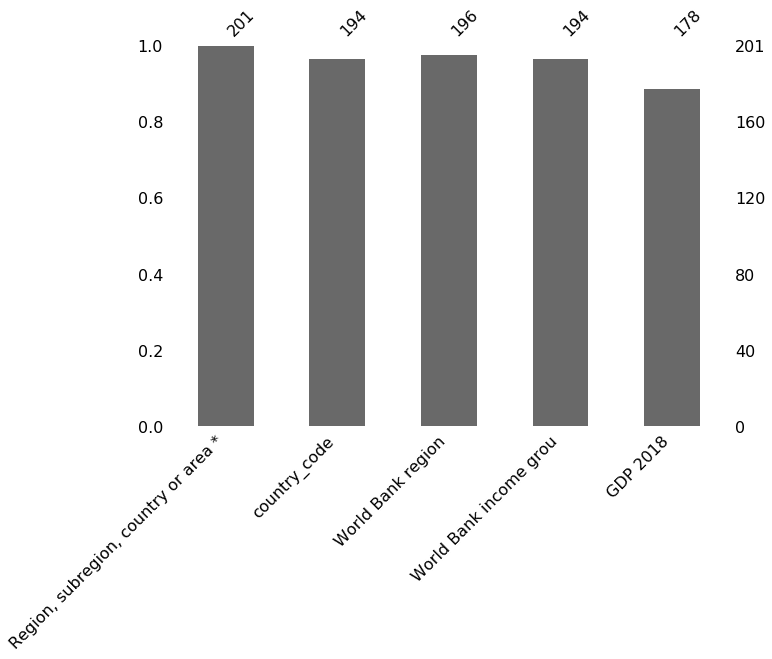

In [8]:
# Visualização dos dados faltantes: quantidade
msn.bar(countries_df, figsize=figsize)

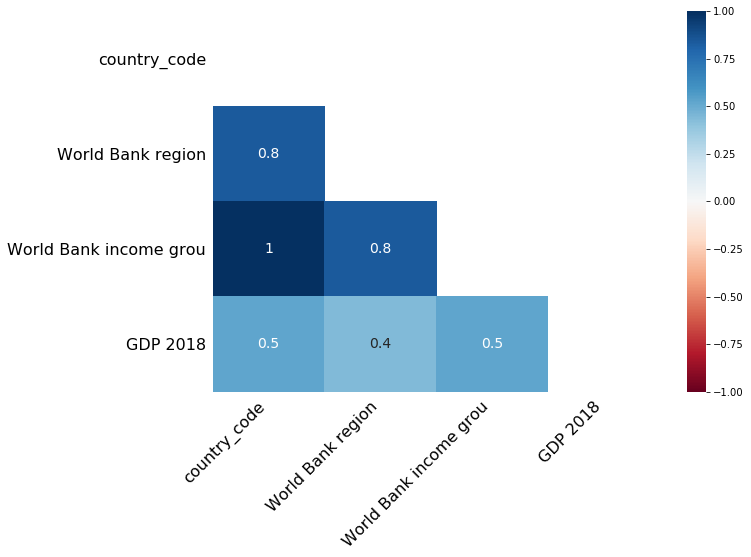

In [9]:
# Visualização de dados faltantes: correlação
msn.heatmap(countries_df, figsize=figsize)

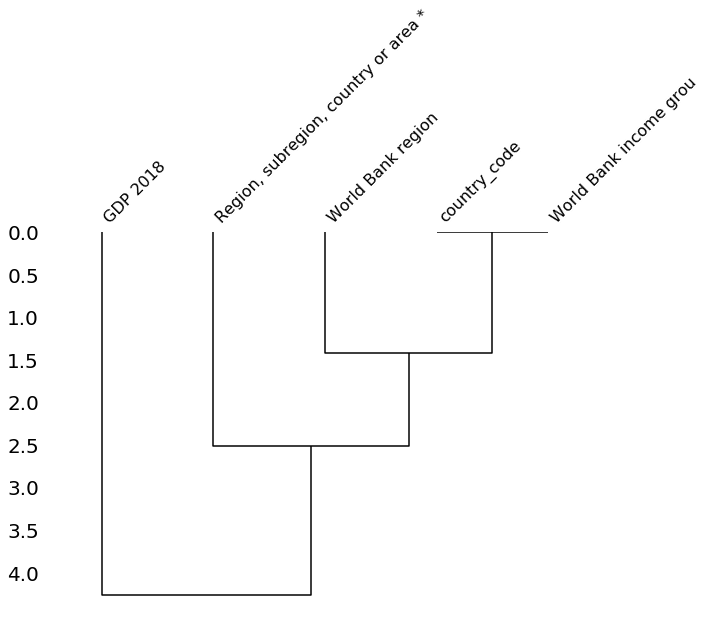

In [10]:
# Visualização de dados faltantes: dendograma
msn.dendrogram(countries_df, figsize=figsize)

In [11]:
# Remoção das amostras faltantes
countries_df.dropna(inplace=True)

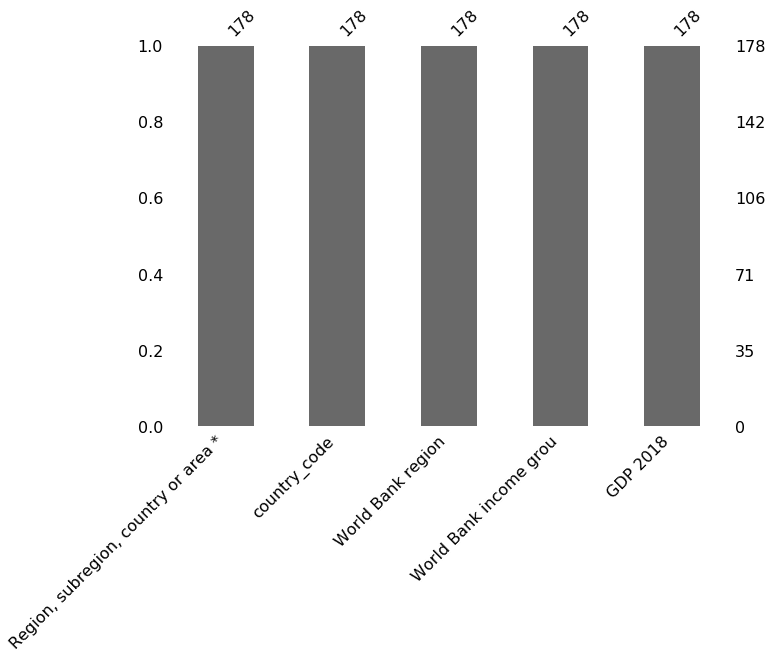

In [12]:
# Validando a remoção
msn.bar(countries_df, figsize=figsize)

### Análise das distribuições

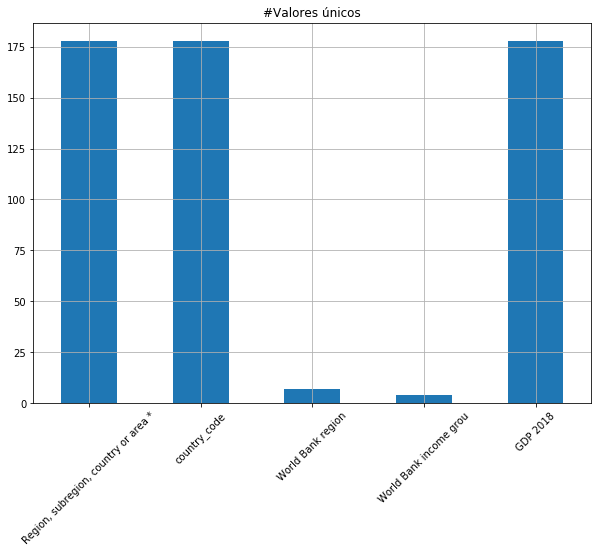

In [13]:
# Número de valores únicos
countries_df.nunique().plot.bar(rot=45, grid=True, title = '#Valores únicos')

In [14]:
# Valores únicos
print(f'Valores únicos da coluna {countries_df.columns[2]}')
print(countries_df[countries_df.columns[2]].unique())

Valores únicos da coluna World Bank region
['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


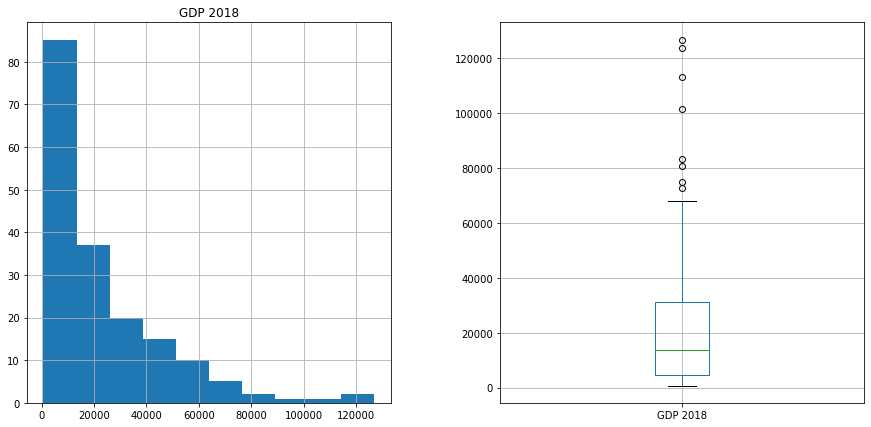

In [15]:
# Visualização da distribuição do GDP
_, ax = plt.subplots(ncols=2, figsize=(15, 7))
countries_df.hist(column='GDP 2018', grid=True, ax=ax[0])
countries_df.boxplot(column='GDP 2018', ax=ax[1])

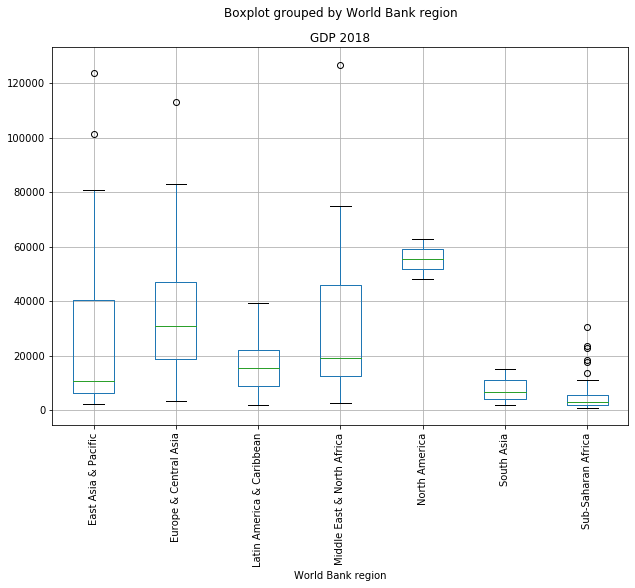

In [16]:
# Separaçãopor região mundial
countries_df.boxplot(column='GDP 2018', by=countries_df.columns[2], rot=90)

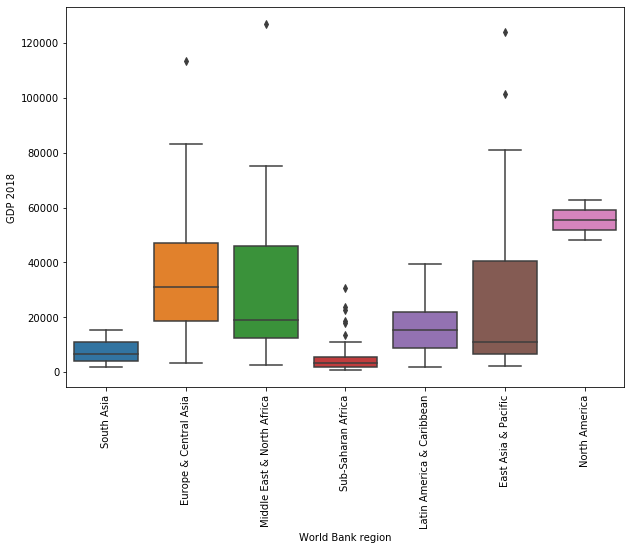

In [17]:
# Visuzalização utilizando o Seaborn
sns.boxplot(data=countries_df, x='World Bank region', y='GDP 2018')
plt.xticks(rotation=90);

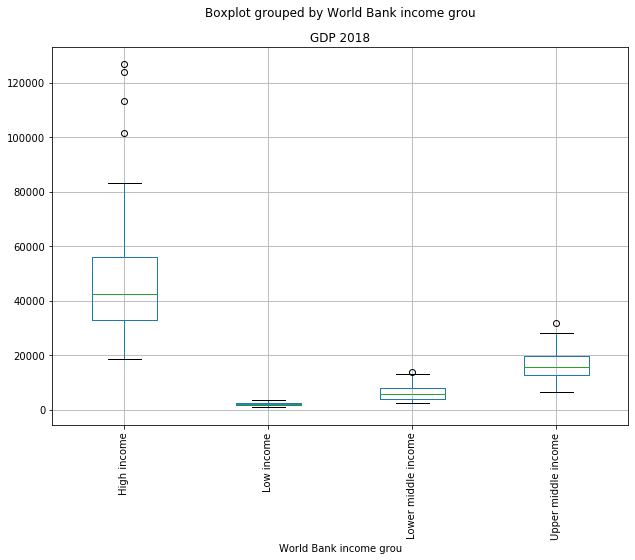

In [18]:
# Separação por grupo financeiro
countries_df.boxplot(column='GDP 2018', by=countries_df.columns[3], rot=90)

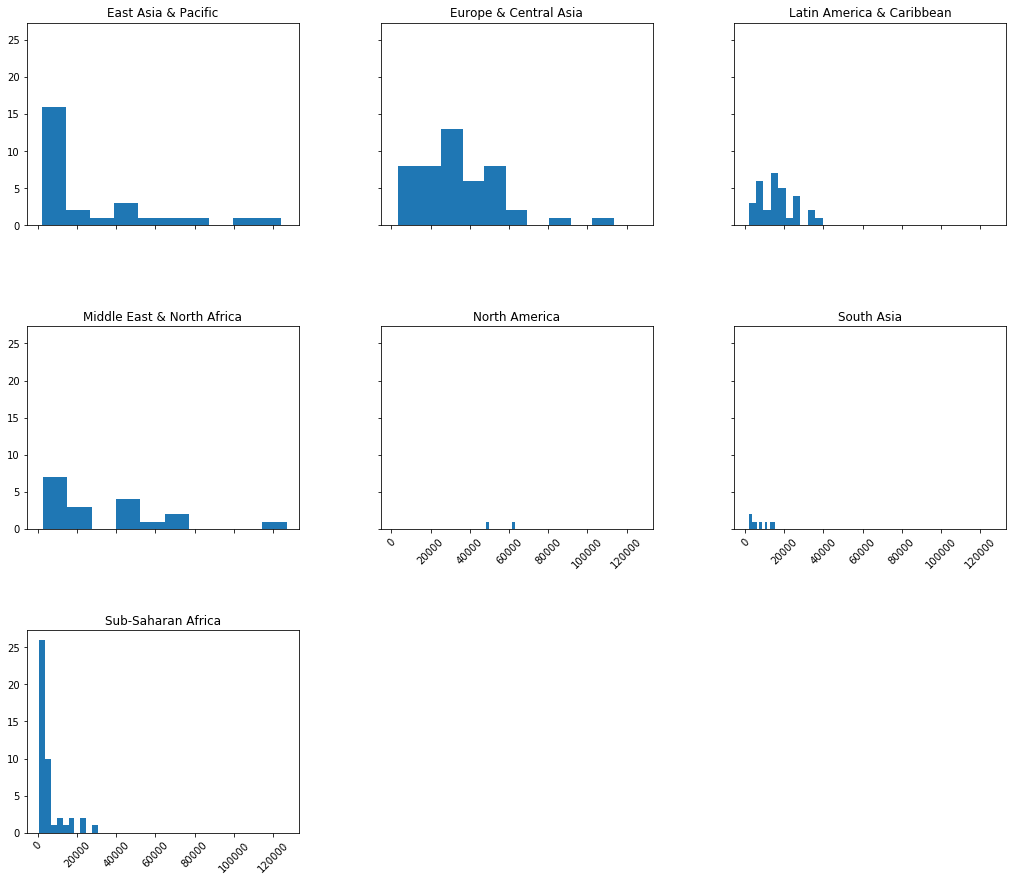

In [19]:
# Visualização da distribuição do GDP por região
countries_df.hist(column='GDP 2018', by=countries_df.columns[2],figsize=(17,15), xrot=45, sharey=True, sharex=True);

### Worksheet: mitigation

In [20]:
mitigation_df = pd.read_excel(data, data.sheet_names[1])

In [21]:
mitigation_df.head()

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
0,Afghanistan,3.3,Unmitigated,0.0,38928341.0,36708969,77708,572873,103031
1,Albania,3.3,Unmitigated,0.0,2877800.0,2525855,20309,101349,26927
2,Algeria,3.3,Unmitigated,0.0,43851043.0,39550379,195348,1138076,258972
3,Angola,3.3,Unmitigated,0.0,32866268.0,30613383,57944,443936,76828
4,Antigua and Barbuda,3.3,Unmitigated,0.0,97928.0,85015,514,2843,681


C:\Users\ANDRE\Anaconda3\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


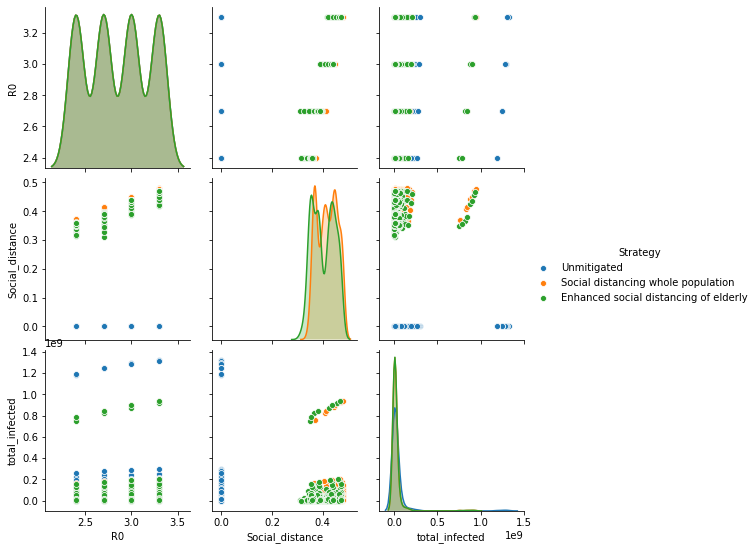

In [22]:
sns.pairplot(mitigation_df,
            vars=['R0', 'Social_distance', 'total_infected'],
            hue='Strategy')

In [23]:
# Slice para pegar dados do estudo do Brasil
br_mitigation_df = mitigation_df.loc[mitigation_df['Country']=='Brazil',:]
br_mitigation_df

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105
1028,Brazil,3.0,Enhanced social distancing of elderly,0.412113,212559409.0,112988886,471742,2925842,625338
1229,Brazil,2.7,Unmitigated,0.000000,212559409.0,172162607,1008804,5490012,1337612
1430,Brazil,2.7,Social distancing whole population,0.390273,212559409.0,105309523,518315,2909776,687127
1631,Brazil,2.7,Enhanced social distancing of elderly,0.370706,212559409.0,102598007,322646,2348908,427709
1832,Brazil,2.4,Unmitigated,0.000000,212559409.0,160125948,908009,4974643,1204268


In [24]:
# Inserindo colunas percentual e por milhão nos valores de população
perc_names = list(br_mitigation_df.columns.values[5:9]+'_perc')
mil_names = list(br_mitigation_df.columns.values[5:9]+'_million')
br_mitigation_df[perc_names] = br_mitigation_df.loc[:, 'total_infected':'total_critical'].div(br_mitigation_df['total_pop'],axis=0)*100
br_mitigation_df[mil_names]=br_mitigation_df.loc[:,'total_infected':'total_critical']*1e-6

C:\Users\ANDRE\Anaconda3\envs\py3-TF2\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
br_mitigation_df.head()

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381,57.407865,0.294998,1.644886,0.391129,122.025818,0.627047,3.496359,0.831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497,56.848507,0.249238,1.515857,0.330494,120.836850,0.529779,3.222096,0.702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105,53.795863,0.271043,1.516105,0.359478,114.348169,0.576128,3.222624,0.764105


In [26]:
# Slice: nenhuma estratégia adotada
no_social_distance = br_mitigation_df.loc[br_mitigation_df['Strategy']=='Unmitigated',:].drop(['Social_distance', 'Country'], axis=1)

In [27]:
no_social_distance

,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,3.3,Unmitigated,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
626,3.0,Unmitigated,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
1229,2.7,Unmitigated,212559409.0,172162607,1008804,5490012,1337612,80.995053,0.474599,2.582813,0.629289,172.162607,1.008804,5.490012,1.337612
1832,2.4,Unmitigated,212559409.0,160125948,908009,4974643,1204268,75.332327,0.427179,2.340354,0.566556,160.125948,0.908009,4.974643,1.204268


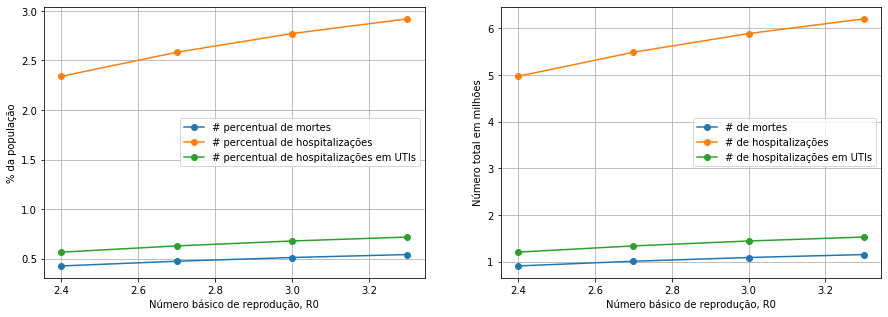

In [28]:
# Plot
fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))

# Plot percentual
no_social_distance.plot(x='R0', y=['total_deaths_perc',
                                  'total_hospital_perc',
                                  'total_critical_perc'],
                                  style='o-',
                                  ax=ax[0],
                                  label = ['# percentual de mortes',
                                          '# percentual de hospitalizações',
                                          '# percentual de hospitalizações em UTIs'])
ax[0].set_ylabel('% da população')
ax[0].set_xlabel('Número básico de reprodução, R0')
ax[0].grid()

# Plot million
no_social_distance.plot(x='R0', y=['total_deaths_million',
                                  'total_hospital_million',
                                  'total_critical_million'],
                                  style='o-',
                                  ax=ax[1],
                                  label = ['# de mortes',
                                          '# de hospitalizações',
                                          '# de hospitalizações em UTIs'])
ax[1].set_ylabel('Número total em milhões')
ax[1].set_xlabel('Número básico de reprodução, R0')
ax[1].grid()

In [29]:
# Comparação entre as estratégias de mitigação
social_distance = br_mitigation_df.drop(['Country'], axis=1)

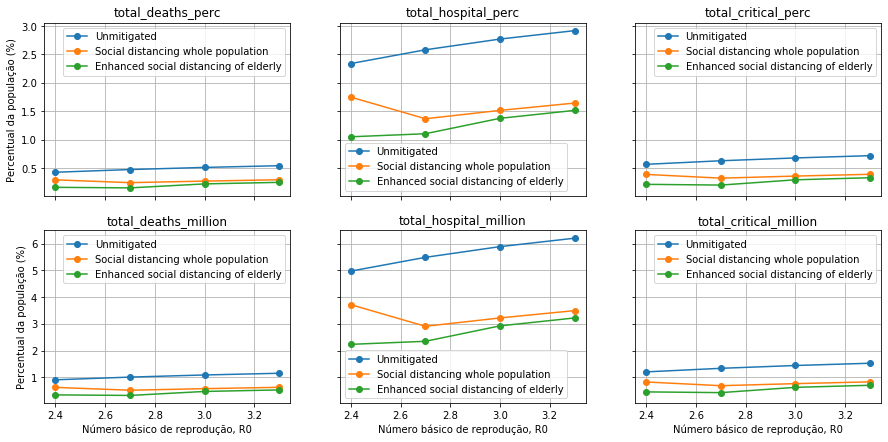

In [30]:
# Plot
y = ['total_deaths',
     'total_hospital',
    'total_critical']
n = len(y) # número de features para plotar
fig, ax = plt.subplots(ncols=n,
                       nrows=2,
                      figsize = (15, 7),
                      sharex=True,
                      sharey='row')

for i in range(n):
    # Nome da coluna
    column = [y[i]+'_perc', y[i]+'_million']
    df = social_distance.loc[:, column+['R0', 'Strategy']]
    for s in df['Strategy'].unique():
        # Plot percentual
        df.loc[df['Strategy']==s, :].plot(x='R0',
                                          y = [column[0]],
                                         style='o-',
                                          ax=ax[0][i],
                                         label = [s])
        ax[0][i].grid()
        ax[0][i].set_title(column[0])
        ax[0][i].set_ylabel('Percentual da população (%)')
        ax[0][i].set_xlabel('Número básico de reprodução, R0')
        
        # Plot absoluto
        df.loc[df['Strategy']==s, :].plot(x='R0',
                                          y = [column[1]],
                                         style='o-',
                                          ax=ax[1][i],
                                         label = [s])
        ax[1][i].grid()
        ax[1][i].set_title(column[1])
        ax[1][i].set_ylabel('Percentual da população (%)')
        ax[1][i].set_xlabel('Número básico de reprodução, R0')